In [11]:
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
import numpy as np


In [12]:
class World:
    def __init__(self):
        self.objects = []  # ここにロボットなどのオブジェクトを登録する

    def append(self, obj):  # オブジェクトを登録するための関数
        self.objects.append(obj)

    def draw(self):
        fig = plt.figure(figsize=(8, 8))  # 8x8inchの図を準備
        # figureの中に座標系を描画するにはサブプロットというオブジェクトを作る必要がある。
        # 111=figの中にサブプロットを1行1列で並べて、今作っているのは1番目という意味
        # figureの中にはサブプロットが1つだけ作成される
        ax = fig.add_subplot(111)  # サブプロットを準備
        ax.set_aspect("equal")  # 縦横比を座標の値と一致させる
        ax.set_xlim(-5, 5)  # X軸を-5m~5mの範囲で描画
        ax.set_ylim(-5, 5)  # Y軸も同じ
        ax.set_xlabel("X", fontsize=20)  # X軸にラベルを表示
        ax.set_ylabel("Y", fontsize=20)  # Y軸も同様に

        # appendしたobjectを描画
        for obj in self.objects:
            obj.draw(ax)

        plt.show()


In [13]:
class IdealRobot:
    def __init__(self, pose, color="black"):
        # 引数で指定された姿勢を初期値に設定
        self.pose = pose
        # ロボットのサイズは固定値
        self.r = 0.2
        # 引数で指定されたカラーを初期値に設定
        self.color = color

    def draw(self, ax):
        # 姿勢の変数を分解して3つの変数に格納
        x, y, theta = self.pose
        # ロボットの鼻先のx座標
        xn = x + self.r * math.cos(theta)
        # ロボットの鼻先のy座標
        yn = y + self.r * math.sin(theta)
        # ロボットの向きを示す線分の描画
        ax.plot([x, xn], [y, yn], color=self.color)
        c = patches.Circle(xy=(x, y), radius=self.r, fill=False, color=self.color)
        # patches.Circleで作成したロボットをサブプロットへ登録
        ax.add_patch(c)


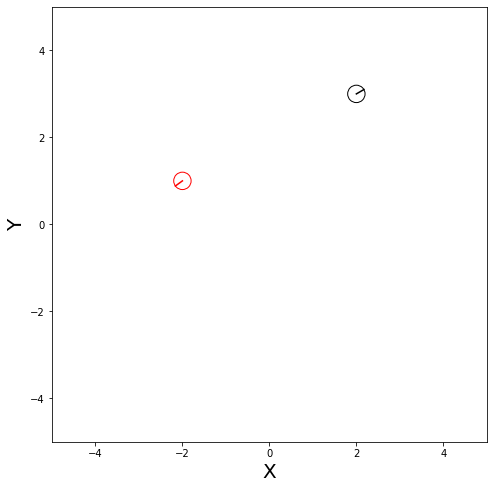

In [14]:
world = World()
robot1=IdealRobot(np.array([2,3,math.pi/6]).T)
robot2=IdealRobot(np.array([-2,1,math.pi/5*6]).T,"red")
world.append(robot1)
world.append(robot2)
world.draw()
